In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
# from matplotlib.mlab import PCA as mlabPCA # deprecated
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'fifa19'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

fifa_df = pd.read_sql_query('select * from fifa19',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

fifa_df = fifa_df.iloc[:,53:87]
fifa_df.corr()

Crossing  Finishing  HeadingAccuracy  ShortPassing   Volleys  \
Crossing         1.000000   0.655300         0.469507      0.809660  0.690339   
Finishing        0.655300   1.000000         0.473427      0.661830  0.882675   
HeadingAccuracy  0.469507   0.473427         1.000000      0.640091  0.505639   
ShortPassing     0.809660   0.661830         0.640091      1.000000  0.698309   
Volleys          0.690339   0.882675         0.505639      0.698309  1.000000   
Dribbling        0.856647   0.824337         0.550750      0.843722  0.809639   
Curve            0.833105   0.759229         0.440846      0.775398  0.807285   
FKAccuracy       0.761107   0.697550         0.407772      0.736659  0.749637   
LongPassing      0.756527   0.512806         0.510779      0.895722  0.571050   
BallControl      0.840916   0.788376         0.658175      0.911451  0.794935   
Acceleration     0.668365   0.606378         0.329647      0.565752  0.572064   
SprintSpeed      0.645578   0.593864         0.379453      0.554681  0.556955   
Agility          0.698320   0.644273         0.260514      0.612899  0.624995   
Reactions        0.389574   0.331376         0.325867      0.483028  0.393713   
Balance          0.618280   0.523787         0.168834      0.533126  0.513682   
ShotPower        0.705503   0.815472         0.611736      0.771845  0.832479   
Jumping          0.135486   0.097464         0.380041      0.197535  0.126228   
Stamina          0.672633   0.510891         0.634589      0.716659  0.527395   
Strength        -0.029403  -0.009744         0.486903      0.133831  0.029505   
LongShots        0.742065   0.877834         0.506814      0.761750  0.868253   
Aggression       0.473570   0.242825         0.692847      0.611570  0.330116   
Interceptions    0.427739  -0.020703         0.548689      0.543350  0.088385   
Positioning      0.783185   0.888790         0.533818      0.757776  0.848333   
Vision           0.684948   0.697290         0.275673      0.713524  0.699471   
Penalties        0.645805   0.837827         0.551978      0.676063  0.829257   
Composure        0.575446   0.533414         0.507208      0.685137  0.595281   
Marking          0.443101   0.024218         0.583123      0.559576  0.120919   
StandingTackle   0.428963  -0.033023         0.561063      0.541131  0.072788   
SlidingTackle    0.409961  -0.071811         0.533643      0.508644  0.035457   
GKDiving        -0.663053  -0.588752        -0.750417     -0.729785 -0.590808   
GKHandling      -0.660193  -0.587145        -0.749888     -0.728024 -0.588668   
GKKicking       -0.659767  -0.583268        -0.746444     -0.724381 -0.584954   
GKPositioning   -0.660160  -0.584852        -0.744443     -0.723782 -0.586131   
GKReflexes      -0.662539  -0.586913        -0.748895     -0.728721 -0.588670   

                 Dribbling     Curve  FKAccuracy  LongPassing  BallControl  \
Crossing          0.856647  0.833105    0.761107     0.756527     0.840916   
Finishing         0.824337  0.759229    0.697550     0.512806     0.788376   
HeadingAccuracy   0.550750  0.440846    0.407772     0.510779     0.658175   
ShortPassing      0.843722  0.775398    0.736659     0.895722     0.911451   
Volleys           0.809639  0.807285    0.749637     0.571050     0.794935   
Dribbling         1.000000  0.842652    0.753600     0.722465     0.938942   
Curve             0.842652  1.000000    0.861277     0.710807     0.829568   
FKAccuracy        0.753600  0.861277    1.000000     0.703544     0.759548   
LongPassing       0.722465  0.710807    0.703544     1.000000     0.788650   
BallControl       0.938942  0.829568    0.759548     0.788650     1.000000   
Acceleration      0.748292  0.607239    0.498215     0.442566     0.675737   
SprintSpeed       0.726835  0.578628    0.466686     0.426586     0.663990   
Agility           0.765153  0.682104    0.590159     0.523426     0.704604   
Reactions         0.369265  0.413413    0.398242     0.461527     0.443750   
Balance    

Now, let's demonstrate the role of rotation in PCA in a 2-D space using only the Crossing and Finishing variables:

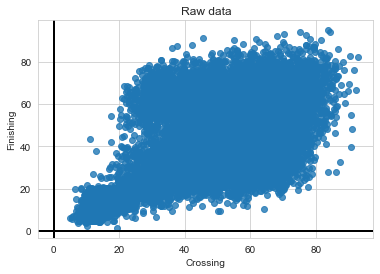

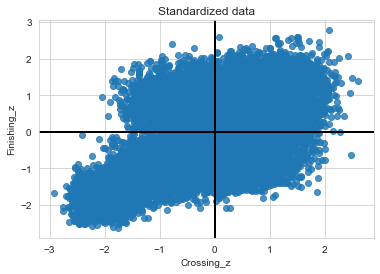

In [3]:
t = sns.regplot(
    'Crossing',
    'Finishing',
    fifa_df,
    x_jitter=.49,                #why jitter .49 and what's jitter
                                                              # go over these lines
    y_jitter=.49,
    fit_reg=False
)
#t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.

fifa_st_df = pd.DataFrame()
fifa_st_df['Crossing_z'] = (fifa_df['Crossing'] - fifa_df['Crossing'].mean()) / fifa_df['Crossing'].std()
fifa_st_df['Finishing_z'] = (fifa_df['Finishing'] - fifa_df['Finishing'].mean()) / fifa_df['Finishing'].std()

t = sns.regplot(
    'Crossing_z',
    'Finishing_z',
    fifa_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

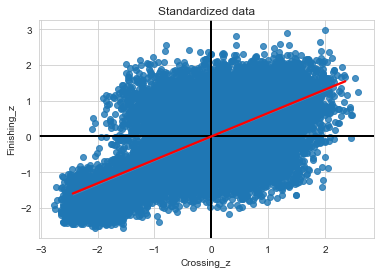

In [4]:
t = sns.regplot(
    'Crossing_z',
    'Finishing_z',
    fifa_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')

sns.regplot('Crossing_z', 
            'Finishing_z', 
            fifa_st_df, 
            scatter=False, 
            color="red")

plt.show()

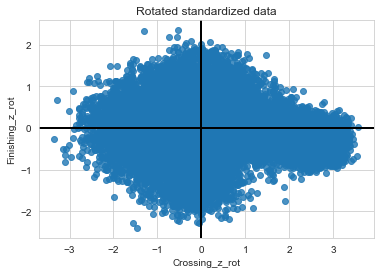

In [5]:
# Rotating the data so that the axes roughly match to vector above.
fifa_st_df['Crossing_z_rot'] = math.cos(40) * fifa_st_df['Crossing_z'] - math.sin(40) * fifa_st_df['Finishing_z']
fifa_st_df['Finishing_z_rot'] = math.sin(40) * fifa_st_df['Crossing_z'] + math.cos(40) * fifa_st_df['Finishing_z']

t = sns.regplot(
    'Crossing_z_rot',
    'Finishing_z_rot',
    fifa_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

didn't get what we're trying to do here with the lines? Are we trying to standardize them so the features fit on the same scale(-1 to 1) to compare with each other????

In [6]:
fifa_df = fifa_df.dropna()
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(fifa_df)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00005507  0.65533573  0.46953243 ... -0.65980319 -0.6601961
  -0.66257575]
 [ 0.65533573  1.00005507  0.4734528  ... -0.58330031 -0.5848846
  -0.5869451 ]
 [ 0.46953243  0.4734528   1.00005507 ... -0.74648538 -0.74448373
  -0.74893673]
 ...
 [-0.65980319 -0.58330031 -0.74648538 ...  1.00005507  0.96438954
   0.96639022]
 [-0.6601961  -0.5848846  -0.74448373 ...  0.96438954  1.00005507
   0.97018302]
 [-0.66257575 -0.5869451  -0.74893673 ...  0.96639022  0.97018302
   1.00005507]]


In [7]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[ 0.20031595  0.17960135  0.16494839  0.21087143  0.18542573  0.21397064
  0.19617801  0.18312402  0.186724    0.22044379  0.16424625  0.1624329
  0.16678123  0.09792308  0.14590308  0.19692239  0.06061726  0.18570425
  0.02849067  0.19595275  0.14657334  0.11695874  0.20068377  0.16230508
  0.18109287  0.15539206  0.12426471  0.11747611  0.11021307 -0.19648369
 -0.19617625 -0.1953696  -0.1954223  -0.19629495]
Eigenvalue 1: 18.849144201671347
----------------------------------------
Eigenvector 2: 
[-0.04188421 -0.22162393  0.17520018  0.03223146 -0.17866954 -0.10445267
 -0.12066113 -0.09891488  0.06745204 -0.03766039 -0.1279576  -0.10640897
 -0.1632028   0.01563515 -0.13947955 -0.08463877  0.11637021  0.10149888
  0.23049983 -0.14678066  0.25950774  0.34905342 -0.1528266  -0.15114339
 -0.14906097  0.00878257  0.33567009  0.35914161  0.36205102 -0.0824759
 -0.08304541 -0.08346555 -0.08147188 -0.08256632]
Eigenvalue 2: 4.910824565403956
----------------------------------

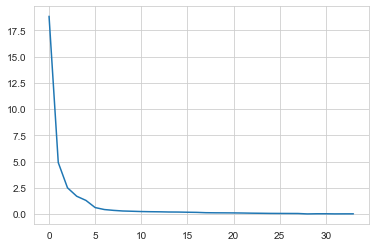

[18.8491442   4.91082457  2.51121968  1.70665278  1.30927179  0.62753979
  0.43931226  0.35950551  0.30147802  0.27677676  0.24896514  0.23252326
  0.22333056  0.20544558  0.20035624  0.18330501  0.17019445  0.13863386
  0.12832669  0.1245334   0.11821725  0.1076127   0.09255947  0.0833471
  0.07218427  0.06826828  0.06511574  0.0613974   0.02293761  0.03729554
  0.03753585  0.02663417  0.03038518  0.03104236]


In [8]:
# print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

Both the scree plot and the eigenvalues >1 rule agree that we should keep only the 1st 5 components. Now it's time to create P, transform X into Y, and look at how well our new component correlates with our old variables.

Ultimately we have a solution that encompasses over 86% of the data's variance in just 5 components, rather than 34 variables.

While we stepped through PCA by hand for learning purposes, there are PCA functions in both matplotlib and scikit-learn that will do it all for you:

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.55435606 0.14442806 0.07385533 0.05019291 0.03850587]


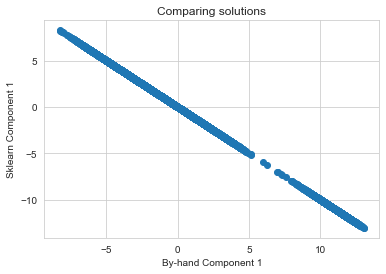

In [9]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()